#Week 2

Goals: The idea is to create a hypothesis, engage with the data, think critically, and use various analytical approaches to produce unique insights.

Below are the datasets used:

**Cab_Data.csv** – this file includes details of transaction for 2 cab companies

**Customer_ID.csv** – this is a mapping table that contains a unique identifier which links the customer’s demographic details

**Transaction_ID.csv** – this is a mapping table that contains transaction to customer mapping and payment mode

**City.csv** – this file contains list of US cities, their population and number of cab users

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
import re

In [2]:
cab_data_url = 'https://raw.githubusercontent.com/DataGlacier/DataSets/refs/heads/main/Cab_Data.csv'
customer_id_url = 'https://raw.githubusercontent.com/DataGlacier/DataSets/refs/heads/main/Customer_ID.csv'
transaction_id_url = 'https://raw.githubusercontent.com/DataGlacier/DataSets/refs/heads/main/Transaction_ID.csv'
city_url = 'https://raw.githubusercontent.com/DataGlacier/DataSets/refs/heads/main/City.csv'

In [3]:
cab = pd.read_csv(cab_data_url)
customer_id = pd.read_csv(customer_id_url)
transaction_id = pd.read_csv(transaction_id_url)
city = pd.read_csv(city_url)

In [4]:
cab.dtypes

,0
Transaction ID,int64
Date of Travel,int64
Company,object
City,object
KM Travelled,float64
Price Charged,float64
Cost of Trip,float64


In [5]:
customer_id.dtypes

,0
Customer ID,int64
Gender,object
Age,int64
Income (USD/Month),int64


In [6]:
transaction_id.dtypes

,0
Transaction ID,int64
Customer ID,int64
Payment_Mode,object


In [7]:
city.dtypes

,0
City,object
Population,object
Users,object


In [8]:
city.shape

(20, 3)

In [9]:
customer_id.shape

(49171, 4)

In [10]:
cab.shape

(359392, 7)

In [11]:
transaction_id.shape

(440098, 3)

In [12]:
#changing population from an object to an integer
city['Population'] = pd.to_numeric(city['Population'].str.replace(',', ''), errors = 'coerce')

In [13]:
#datasets can be merged together
merged_df = cab.merge(transaction_id,
                      on = 'Transaction ID',
                      how = 'inner').merge(
                          city,
                          on ='City',
                          how = 'inner'
                      )
merged_df = merged_df.merge(customer_id,
                           on = 'Customer ID',
                           how = 'inner')
merged_df

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Population,Users,Gender,Age,Income (USD/Month)
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card,814885,"24,701",Male,28,10813
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Card,814885,"24,701",Male,27,9237
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.6320,28712,Cash,814885,"24,701",Male,53,11242
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.6020,28020,Cash,814885,"24,701",Male,23,23327
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.7760,27182,Card,814885,"24,701",Male,33,8536
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359387,10440101,43108,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600,52392,Cash,418859,"127,001",Male,24,15651
359388,10440104,43104,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480,53286,Cash,418859,"127,001",Male,32,6528
359389,10440105,43105,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500,52265,Cash,418859,"127,001",Male,56,7966
359390,10440106,43105,Yellow Cab,WASHINGTON DC,8.80,146.19,114.0480,52175,Card,418859,"127,001",Male,32,6423


In [14]:
#checking if any of the datasets contain NA values
merged_df.isna().sum()

,0
Transaction ID,0
Date of Travel,0
Company,0
City,0
KM Travelled,0
Price Charged,0
Cost of Trip,0
Customer ID,0
Payment_Mode,0
Population,0


In [15]:
#checking for outliers
merged_df.describe()

,Transaction ID,Date of Travel,KM Travelled,Price Charged,Cost of Trip,Customer ID,Population,Age,Income (USD/Month)
count,3.593920e+05,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000,3.593920e+05,359392.000000,359392.000000
mean,1.022076e+07,42964.067998,22.567254,423.443311,286.190113,19191.652115,3.132198e+06,35.336705,15048.822937
std,1.268058e+05,307.467197,12.233526,274.378911,157.993661,21012.412463,3.315194e+06,12.594234,7969.409482
min,1.000001e+07,42371.000000,1.900000,15.600000,19.000000,1.000000,2.489680e+05,18.000000,2000.000000
25%,1.011081e+07,42697.000000,12.000000,206.437500,151.200000,2705.000000,6.712380e+05,25.000000,8424.000000
50%,1.022104e+07,42988.000000,22.440000,386.360000,282.480000,7459.000000,1.595037e+06,33.000000,14685.000000
75%,1.033094e+07,43232.000000,32.960000,583.660000,413.683200,36078.000000,8.405837e+06,42.000000,21035.000000
max,1.044011e+07,43465.000000,48.000000,2048.030000,691.200000,60000.000000,8.405837e+06,65.000000,35000.000000


In [16]:
#changing the date of travel to allow for readable dates
def date(x):
    temp = dt.datetime(1900, 1, 1)
    delta = dt.timedelta(x)
    return temp+delta

merged_df['Date of Travel'] = (merged_df['Date of Travel'].map(date))

start = pd.to_datetime("2016-01-31")
end = pd.to_datetime("2018-12-31")


merged_df['Date of Travel'].unique()

<DatetimeArray>
['2016-01-10 00:00:00', '2016-01-08 00:00:00', '2016-01-04 00:00:00',
 '2016-01-09 00:00:00', '2016-01-05 00:00:00', '2016-01-14 00:00:00',
 '2016-01-13 00:00:00', '2016-01-12 00:00:00', '2016-01-11 00:00:00',
 '2016-01-07 00:00:00',
 ...
 '2018-12-23 00:00:00', '2018-12-26 00:00:00', '2018-12-22 00:00:00',
 '2018-12-27 00:00:00', '2018-12-31 00:00:00', '2018-12-30 00:00:00',
 '2019-01-02 00:00:00', '2018-12-29 00:00:00', '2019-01-01 00:00:00',
 '2018-12-28 00:00:00']
Length: 1095, dtype: datetime64[ns]

In [17]:
#limit to the time period
merged_df = merged_df.copy()
merged_df = merged_df[(merged_df['Date of Travel'] >= start) & (merged_df['Date of Travel'] <= end)]
merged_df.loc[:, 'Year'] = merged_df['Date of Travel'].dt.year

<ipython-input-17-b034488cc45d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df.loc[:, 'Year'] = merged_df['Date of Travel'].dt.year


In [18]:
#convert date to a string to be used later
merged_df = merged_df.copy()
merged_df['Date of Travel'] = merged_df['Date of Travel'].astype(str).str[:10]
merged_df['Date of Travel']

,Date of Travel
3303,2016-02-04
3304,2016-01-31
3309,2016-02-01
3310,2016-01-31
3311,2016-02-03
...,...
359387,2018-01-10
359388,2018-01-06
359389,2018-01-07
359390,2018-01-07


In [19]:
#creating profits column to use for different hypothesis
merged_df = merged_df.copy()
merged_df['Profits'] = merged_df['Price Charged'] - merged_df['Cost of Trip']
merged_df['Profits']

,Profits
3303,69.4920
3304,-120.9620
3309,-4.4800
3310,-18.7220
3311,-47.3550
...,...
359387,5.8800
359388,6.9020
359389,87.4200
359390,32.1420


In [20]:
#checking all unique cities
merged_df['City'].unique()

array(['ATLANTA GA', 'AUSTIN TX', 'BOSTON MA', 'CHICAGO IL', 'DALLAS TX',
       'DENVER CO', 'LOS ANGELES CA', 'MIAMI FL', 'NEW YORK NY',
       'ORANGE COUNTY', 'SACRAMENTO CA', 'SAN DIEGO CA', 'SEATTLE WA',
       'SILICON VALLEY', 'TUCSON AZ', 'WASHINGTON DC', 'PITTSBURGH PA',
       'NASHVILLE TN', 'PHOENIX AZ'], dtype=object)

In [21]:
#making a state column to organize data by state instead of cities
merged_df = merged_df.copy()

merged_df['State'] = merged_df['City'].str.replace(r'COUNTY|VALLEY', 'CA', regex=True).str[-2:]
merged_df['State']

,State
3303,GA
3304,TX
3309,MA
3310,MA
3311,MA
...,...
359387,DC
359388,DC
359389,DC
359390,DC


In [22]:
#checking columns dtype to check for any problems
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 354958 entries, 3303 to 359391
Data columns (total 17 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Transaction ID      354958 non-null  int64  
 1   Date of Travel      354958 non-null  object 
 2   Company             354958 non-null  object 
 3   City                354958 non-null  object 
 4   KM Travelled        354958 non-null  float64
 5   Price Charged       354958 non-null  float64
 6   Cost of Trip        354958 non-null  float64
 7   Customer ID         354958 non-null  int64  
 8   Payment_Mode        354958 non-null  object 
 9   Population          354958 non-null  int64  
 10  Users               354958 non-null  object 
 11  Gender              354958 non-null  object 
 12  Age                 354958 non-null  int64  
 13  Income (USD/Month)  354958 non-null  int64  
 14  Year                354958 non-null  int32  
 15  Profits             354958 non-null 

In [23]:
merged_df.shape

(354958, 17)

#Hypothesis 1
The average cost of trips would be lower if there were fewer customers, as this would encourage more people to use their services.

Text(158.22222222222223, 0.5, 'State')

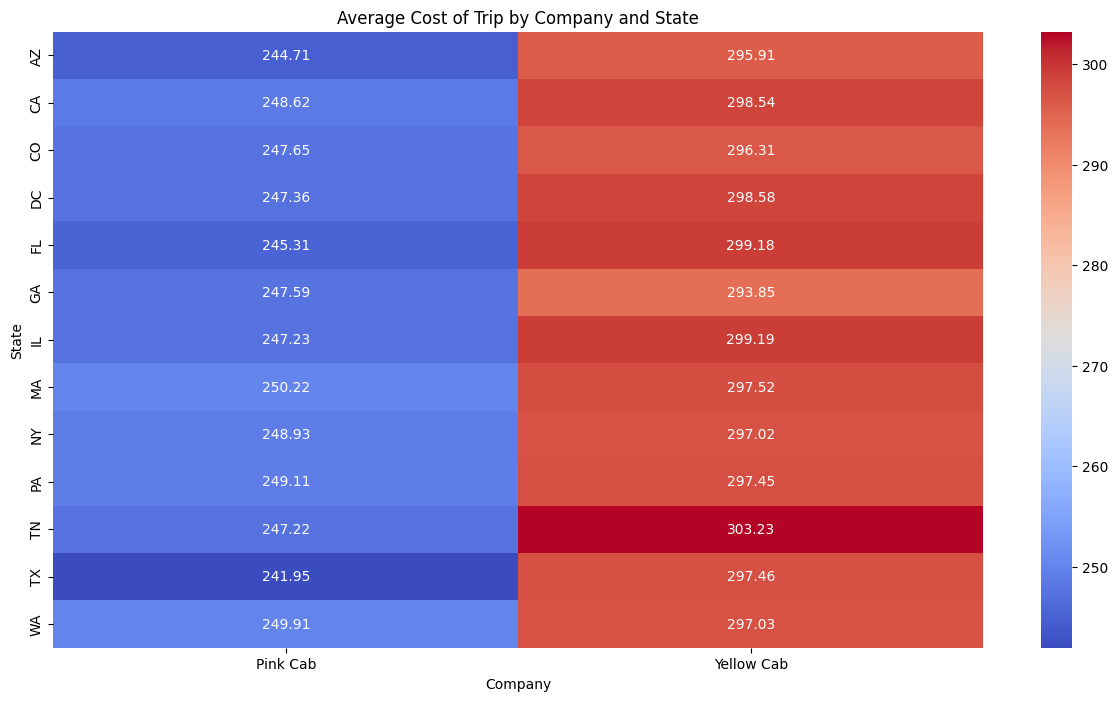

In [24]:
avg_trip_cost = merged_df.pivot_table(index='State', columns='Company', values='Cost of Trip', aggfunc='mean')

plt.figure(figsize = (15, 8))
sns.heatmap(avg_trip_cost,
            annot = True,
            fmt = ".2f",
            cmap = "coolwarm");

plt.title("Average Cost of Trip by Company and State")
plt.xlabel("Company")
plt.ylabel("State")


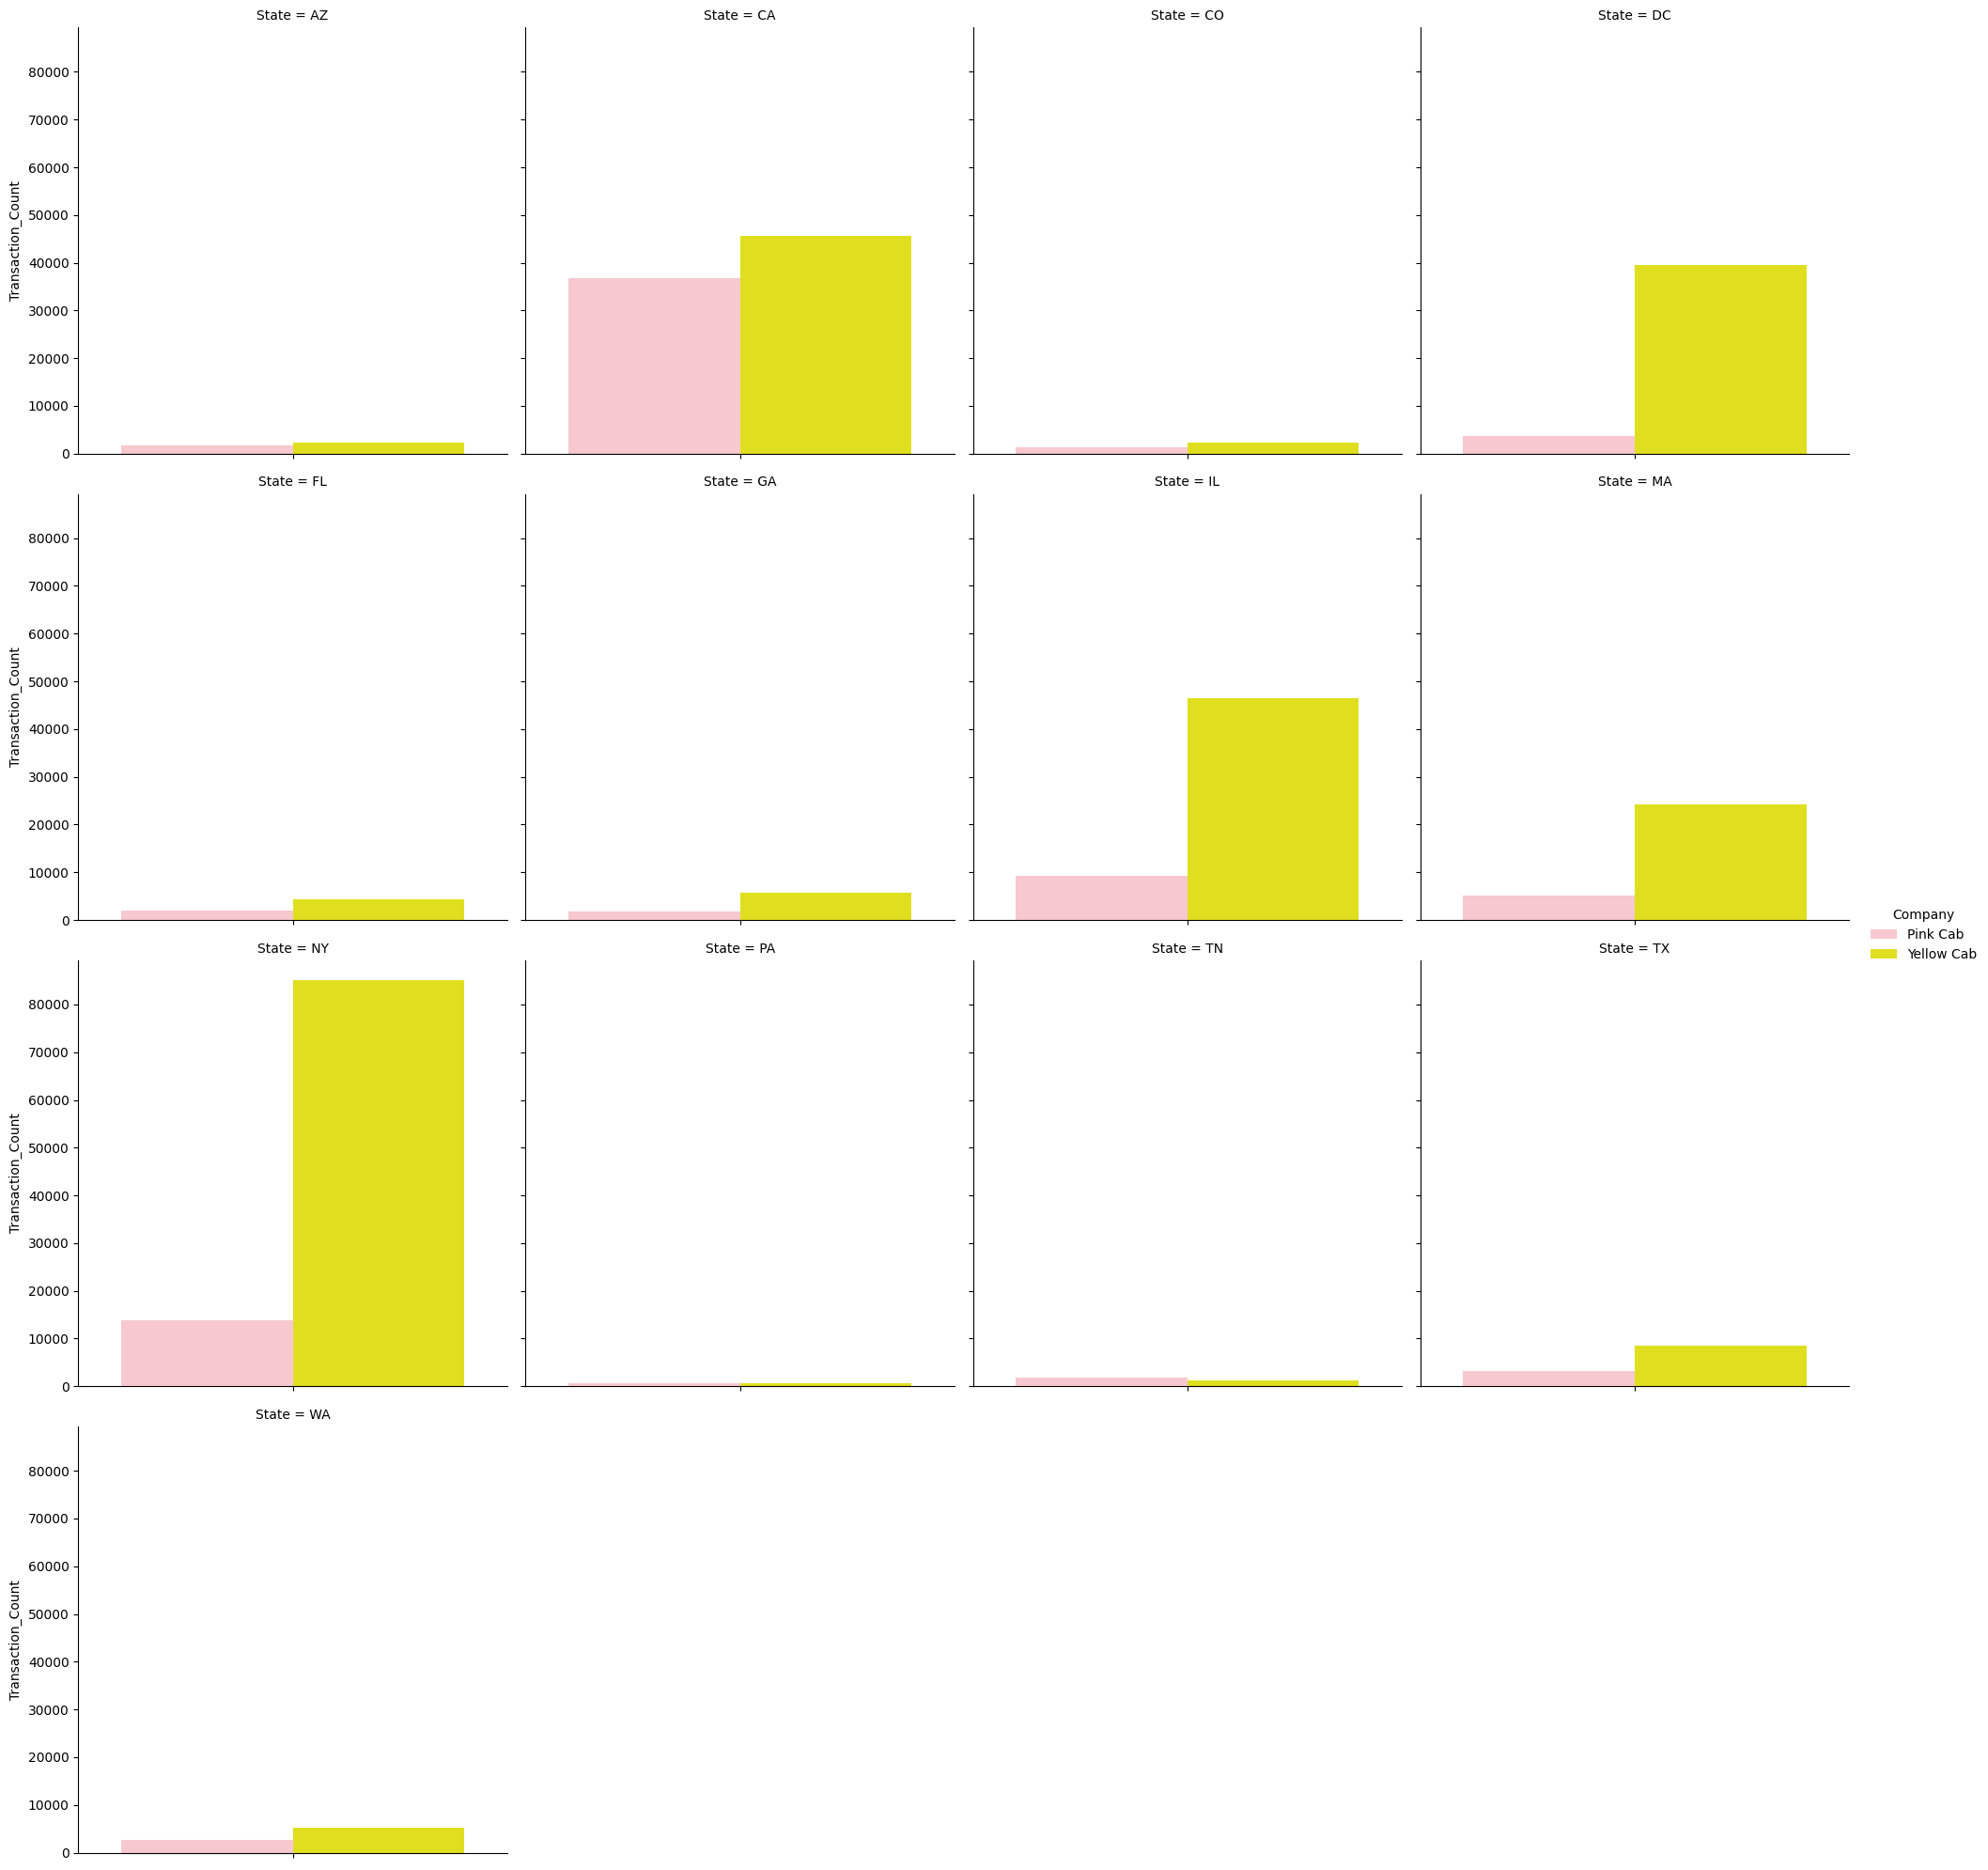

In [25]:
transaction_counts = merged_df.groupby(['Company', 'State'])['Transaction ID'].nunique().reset_index()
transaction_counts.rename(columns={'Transaction ID': 'Transaction_Count'}, inplace=True)


sns.catplot(data = transaction_counts,
            y = 'Transaction_Count',
            hue = 'Company',
            palette = {'Yellow Cab': 'Yellow', 'Pink Cab': 'Pink'},
            kind = 'bar',
            col = 'State',
            height = 5,
            aspect= 1,
            col_wrap = 4
);

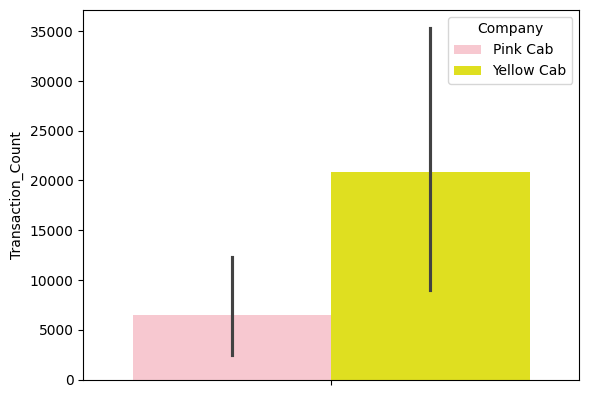

In [26]:
sns.barplot(transaction_counts,
            y = 'Transaction_Count',
            hue = 'Company',
            palette = {'Yellow Cab': 'yellow', 'Pink Cab': 'pink'}
            );

#Hypothesis 2
Payment method preference varies by cab company, with one company seeing higher usage among customers paying by a specific method.



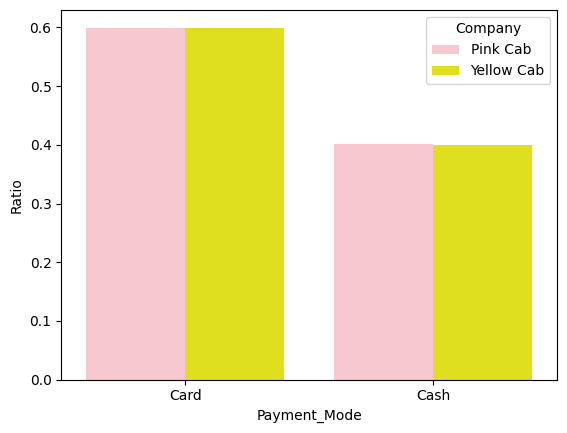

In [27]:
payment_counts = merged_df.groupby(['Company', 'Payment_Mode']).size().reset_index(name='Count')
total_counts = merged_df.groupby('Company').size().reset_index(name='Total')
ratios_df = payment_counts.merge(total_counts, on='Company')
ratios_df['Ratio'] = ratios_df['Count'] / ratios_df['Total']

sns.barplot(data=ratios_df,
            x = 'Payment_Mode',
            y = 'Ratio',
            hue = 'Company',
            palette = {'Yellow Cab': 'yellow', 'Pink Cab': 'pink'}
);


#Hypothesis 3
Companies may profit differently based on distance travelled

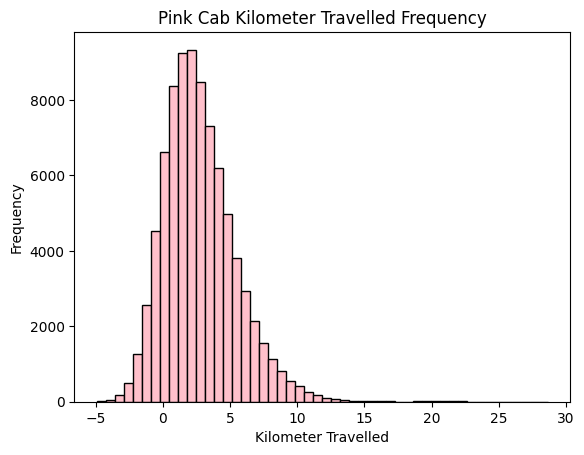

In [28]:
pink = merged_df[merged_df['Company'] == 'Pink Cab'].copy()
pink['profit_per_km'] = pink['Profits']/pink['KM Travelled']

plt.hist(pink['profit_per_km'],
         bins = 50,
         color = 'pink',
         edgecolor='black'
         );

plt.xlabel("Kilometer Travelled")
plt.ylabel("Frequency")
plt.title("Pink Cab Kilometer Travelled Frequency");


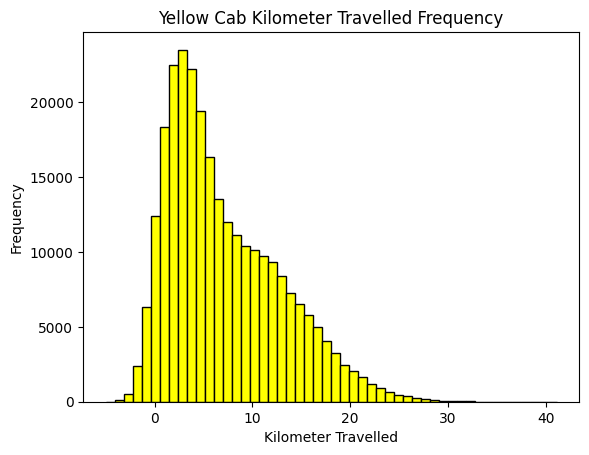

In [29]:
yellow = merged_df[merged_df['Company'] == 'Yellow Cab'].copy()
yellow['profit_per_km'] = yellow['Profits']/yellow['KM Travelled']

plt.hist(yellow['profit_per_km'],
         bins = 50,
         color = 'yellow',
         edgecolor = 'black');

plt.xlabel("Kilometer Travelled")
plt.ylabel("Frequency")
plt.title("Yellow Cab Kilometer Travelled Frequency");


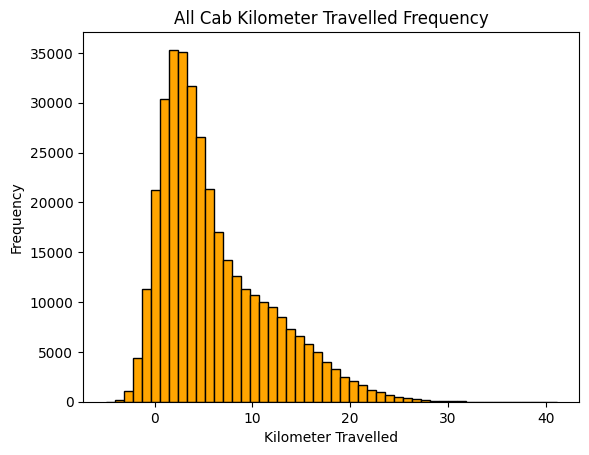

In [30]:
#combination of both yellow and pink cab to a single histogram

merged_df['profit_per_km'] = merged_df['Profits']/merged_df['KM Travelled'].copy()
plt.hist(merged_df['profit_per_km'],
         bins = 50,
         color = 'orange',
         edgecolor = 'black'
         );

plt.xlabel("Kilometer Travelled")
plt.ylabel("Frequency")
plt.title("All Cab Kilometer Travelled Frequency");

#Hypothesis 4
Certain months show higher cab usage such as holidays such as Thanksgving and Christmas. December will have more cab traffic as many people are flying home or out for the holidays.

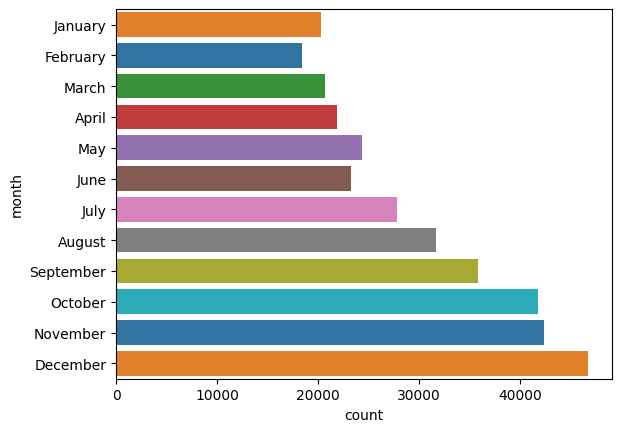

In [31]:
merged_df_copy = merged_df.copy()
def month_number_to_name(month):
    month_names = [
        'January', 'February', 'March', 'April', 'May', 'June',
        'July', 'August', 'September', 'October', 'November', 'December'
    ]
    month_index = int(month) - 1
    if 0 <= month_index < 12:
        return month_names[month_index]

month_order = [
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
]

merged_df_copy.loc[:, 'month'] = merged_df_copy['Date of Travel'].str[5:7].map(month_number_to_name)

sns.countplot(data = merged_df_copy,
              y = 'month',
              order = month_order,
              palette = 'tab10',
              hue = 'month');

#Hypothesis 5
Company experiences different amount of customers based on which state they are in.

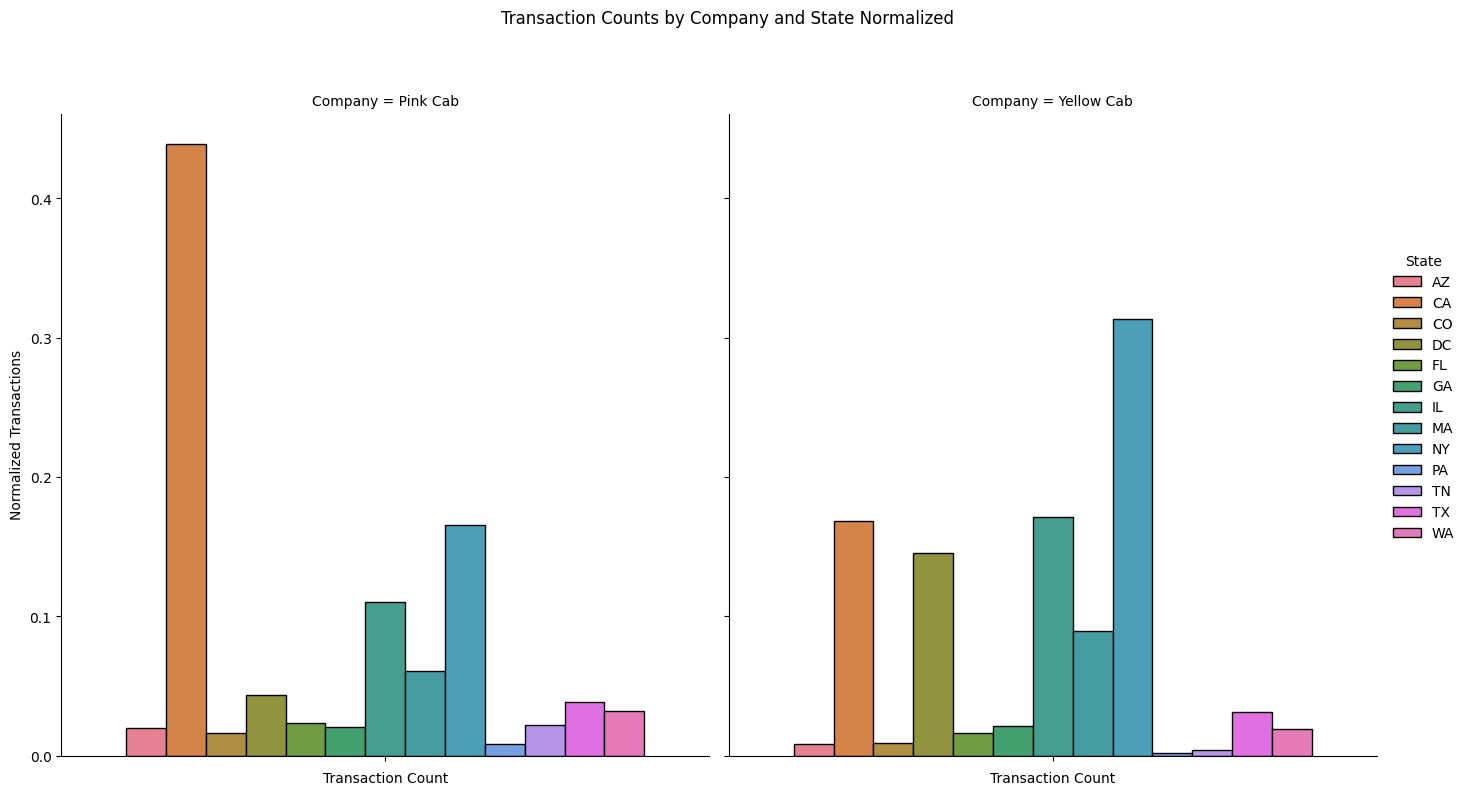

In [32]:
transaction_counts = merged_df.groupby(['Company', 'State'])['Transaction ID'].nunique().reset_index()
transaction_counts.rename(columns={'Transaction ID': 'Transaction_Count'}, inplace=True)

transaction_counts['Transaction_Normalized'] = transaction_counts.groupby('Company')['Transaction_Count'].transform(lambda x: x / x.sum())

g = sns.catplot(data = transaction_counts,
                kind = "bar",
                hue = "State",
                y = "Transaction_Normalized",
                col = "Company",
                height = 7,
                aspect = 1,
                edgecolor = 'black'
);
g.set_axis_labels("Transaction Count", "Normalized Transactions")
g.fig.suptitle("Transaction Counts by Company and State Normalized", y = 1.1);

#Hypothesis 6
The number of card payments will grow as we move towards a digital world.

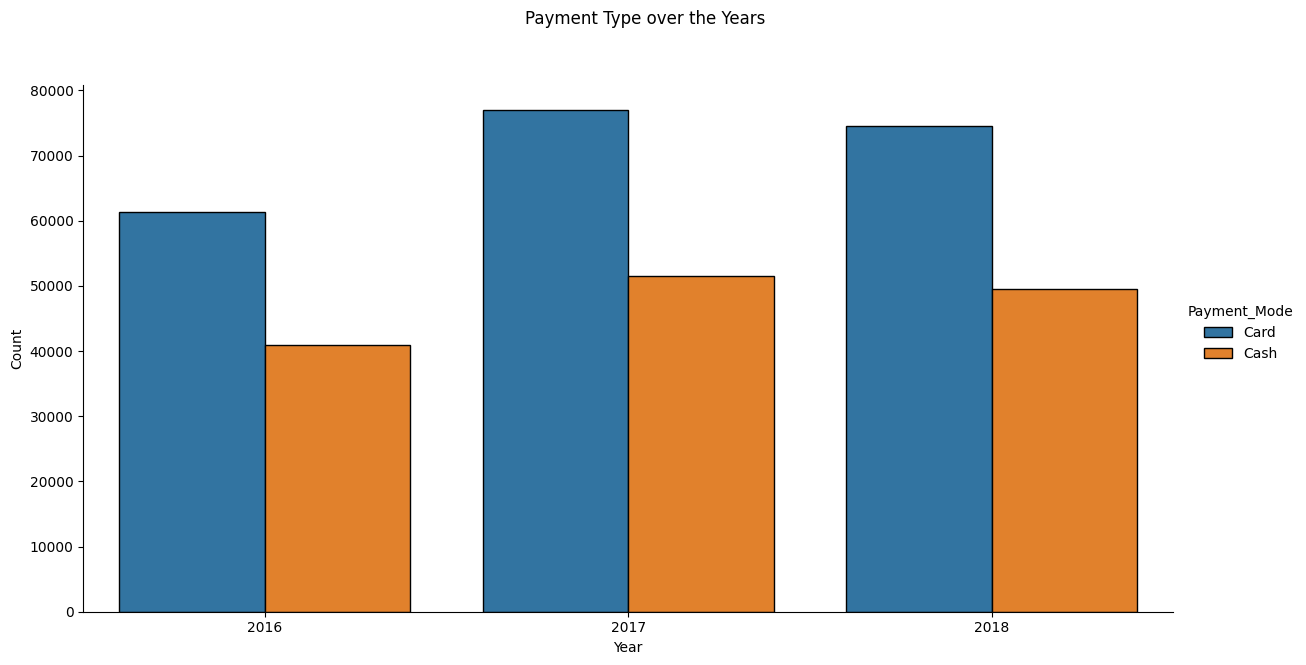

In [33]:
payment_counts = merged_df.groupby(['Year', 'Payment_Mode']).size().reset_index(name='Count')

g = sns.catplot(data=payment_counts,
            x = 'Year',
            y = 'Count',
            hue = 'Payment_Mode',
            kind = 'bar',
            height = 6,
            aspect = 2 ,
            edgecolor = 'black'
);
g.fig.suptitle("Payment Type over the Years", y=1.1);

#Hypothesis Results and Recommendations
1. The average cost of trips would be lower if there were fewer customers, as this would encourage more people to use their services.
  * As seen in the heatmap, Yellow Cab charges significantly more than Pink Cab, with every state showing a higher average cost for Yellow Cab. To test our hypothesis, we also need to consider the number of transactions in each state. Except for Tennessee, where the difference is small, Yellow Cab has more transactions in every other state. This suggests that Yellow Cab's ability to attract more customers allows them to maintain higher prices compared to the Pink Cab.
  * **Recommendations:** Avoid increasing prices in an attempt to grow the loyal customer base, as this may deter potential users. Prices should only be increased once a sustainable level of profit has been ensured.
2. Payment method preference varies by cab company, with one company seeing higher usage among customers paying by a specific method.
  *   As we move towards a more technological world, it is important to accommodate different payment methods, such as card payments. It appears that both companies have an equal balance of card and cash users, with a growing number of people opting for cards over cash. This suggests that the customer base for both companies is essentially the same.
  * **Recommendations:** Although both companies have a similar balance of card and cash users, it's important to accommodate other payment methods, such as Apple Pay and Samsung Pay, to ensure accessibility for all customers.
3. Companies may profit differently based on distance travelled.
  *   When looking at the distribution of all the graphs from the pink cab company, the yellow cab company, and both combined, we see that the companies prices drop after a certain point. This goes against my hypothesis, suggesting that both companies follow the same structure of having shorter trips for more profit and not structured for longer drives.
   * **Recommendations:** Most profits occur in shorter drives which helps lessens time spent with customers as well as profitting more. However, it is interesting to see how companies can look to improve their profits in longer drives.
4. Certain months show higher cab usage such as holidays such as Thanksgving and Christmas. December will have more cab traffic as many people are flying home or out for the holidays.
  * It seems that December peaks in the amount of people using cabs, suggesting holidays being a driving factor for people to use cabs. Months that have less federal holidays tend to see less cab traffic such as months from February to July.
  * **Recommendations:** Companies should look to find ways to improve customers in those periods of time.
5. Company experiences different amount of customers based on which state they are in.
  * To begin, we had normalize the data so the company with more transactions do not make the visualization look improper. It seems that it is true that the two companibes experiences different amount of customers based on which state they are in. The Pink Cab seems to have more customers in California and the Yellow Cab seems to have more customers in New York.
  * **Recommendations:** While each company is well established in certain states, they should consider expanding into new regions to increase their presence in areas where they are less known.
6. The number of card payments will grow as we move towards a digital world.
  * The test seems inconclusive, as there is a slight upward trend suggesting a shift toward a more digital world. However, the results remain uncertain, and we need to extend the time period to observe a clearer trend and determine whether card payments will continue to grow. This would indicate that more cab companies are becoming more technologically accommodating.
  * **Recommendations:** We should analyze a longer time period to determine if there is a trend toward increased card usage, which would indicate a need to accommodate additional payment options. As virtual currency becomes more prevalent, it's important to assess whether cab companies are following this trend.


